In [ ]:
## preparation
# !pip install yfinance

In [1]:
## preparation
import numpy as np
import pandas as pd
import pandas_datareader
from pandas_datareader import data
import yfinance as yf
yf.pdr_override()
from pylab import plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [3]:
## (a)train a linear regression model that to predict the average opening price of the next five trading days based on the opening price of today
mtr = data.DataReader('0066.HK', start="2010-01-01", end="2020-06-30")
today = np.array(mtr['Open'].iloc[:len(mtr)-5])
next5dayA = np.array(list(map(lambda i:
    (mtr['Open'].iloc[i+1]
    +mtr['Open'].iloc[i+2]
    +mtr['Open'].iloc[i+3]
    +mtr['Open'].iloc[i+4]
    +mtr['Open'].iloc[i+5]) / 5.0
    ,
    range(0, len(mtr) - 5)
     ))
    )
today = today.reshape((-1,1))
x_train, x_test, y_train, y_test = train_test_split(today, next5dayA, test_size=0.25)  # may add a random_state
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

[*********************100%***********************]  1 of 1 completed


In [4]:
## a
res_msr = mean_squared_error(y_test, y_pred)
print(f'mean_squared_error = {res_msr}')

mean_squared_error = 0.435504173705983


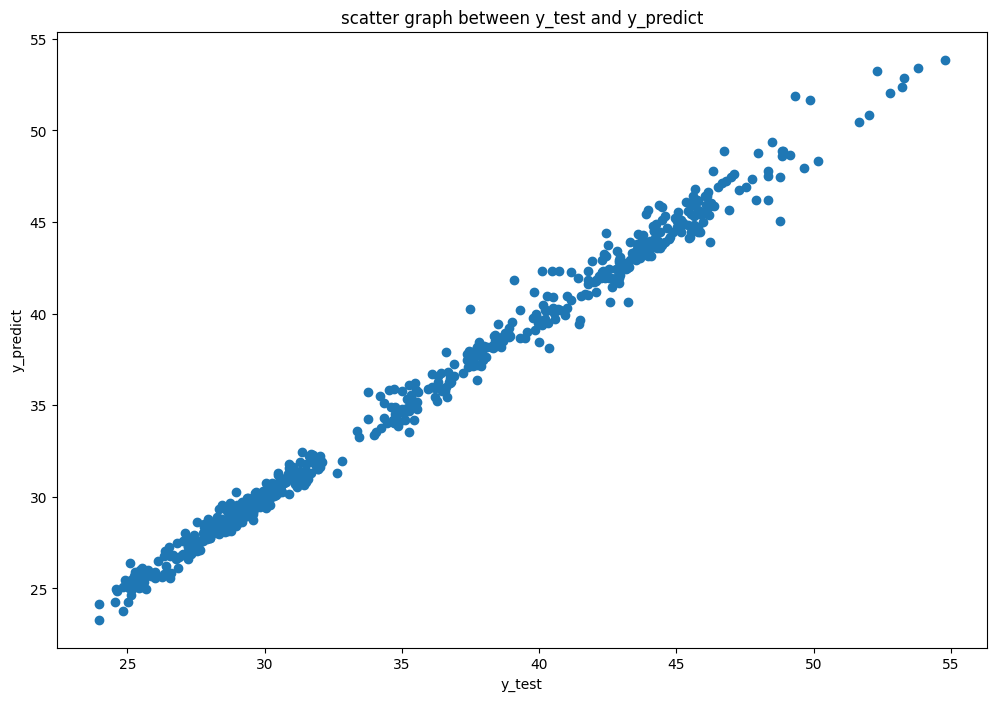

In [5]:
## a
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.title('scatter graph between y_test and y_predict')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

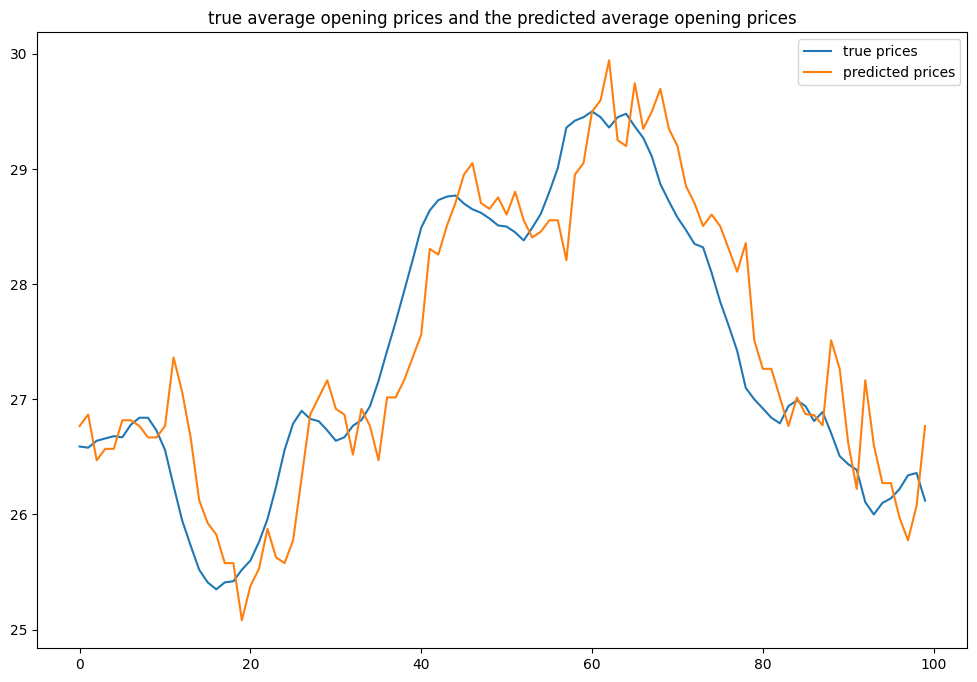

In [6]:
## a
plt.figure(figsize=(12,8))
y_pred = reg.predict(today[:100])
plt.plot(next5dayA[:100]) #blue line
plt.plot(y_pred)  #orange line
plt.legend(["true prices", "predicted prices"])
plt.title("true average opening prices and the predicted average opening prices")
plt.show()

In [8]:
## b) train a linear regression model that to predict the average opening price of the next five trading days based on the opening price of average price of previous five days, i.e., today and past 4 days;
mtr = data.DataReader('0066.HK', start="2010-01-01", end="2020-06-30")
today = np.array(list(map(lambda i:
    (mtr['Open'].iloc[i]
    +mtr['Open'].iloc[i-1]
    +mtr['Open'].iloc[i-2]
    +mtr['Open'].iloc[i-3]
    +mtr['Open'].iloc[i-4]) / 5.0
    ,
    range(4, len(mtr) - 5)
     ))
    )  # clearer to see
nextday = np.array(list(map(lambda i:
    (mtr['Open'].iloc[i+1]
    +mtr['Open'].iloc[i+2]
    +mtr['Open'].iloc[i+3]
    +mtr['Open'].iloc[i+4]
    +mtr['Open'].iloc[i+5]) / 5.0
    ,
    range(4, len(mtr) - 5)
     ))
    )
today = today.reshape((-1,1))
x_train, x_test, y_train, y_test = train_test_split(today, nextday, test_size=0.25)  # may add a random_state
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

[*********************100%***********************]  1 of 1 completed


In [9]:
## b
res_msr = mean_squared_error(y_test, y_pred)
print(f'mean_squared_error = {res_msr}')

mean_squared_error = 0.5099699771495477


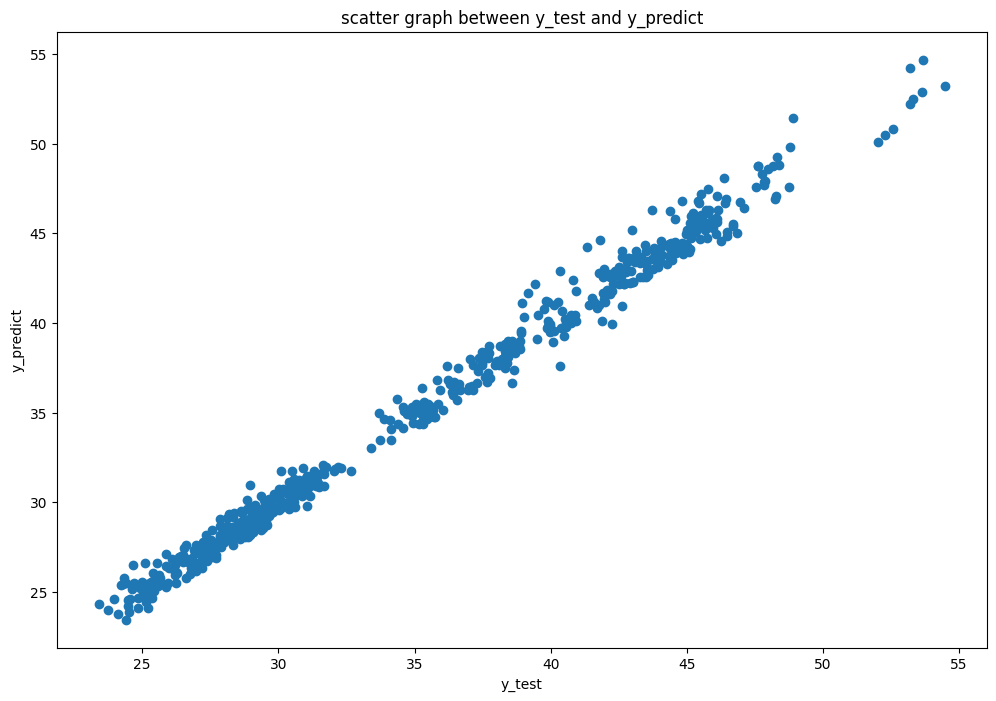

In [10]:
## b
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.title('scatter graph between y_test and y_predict')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

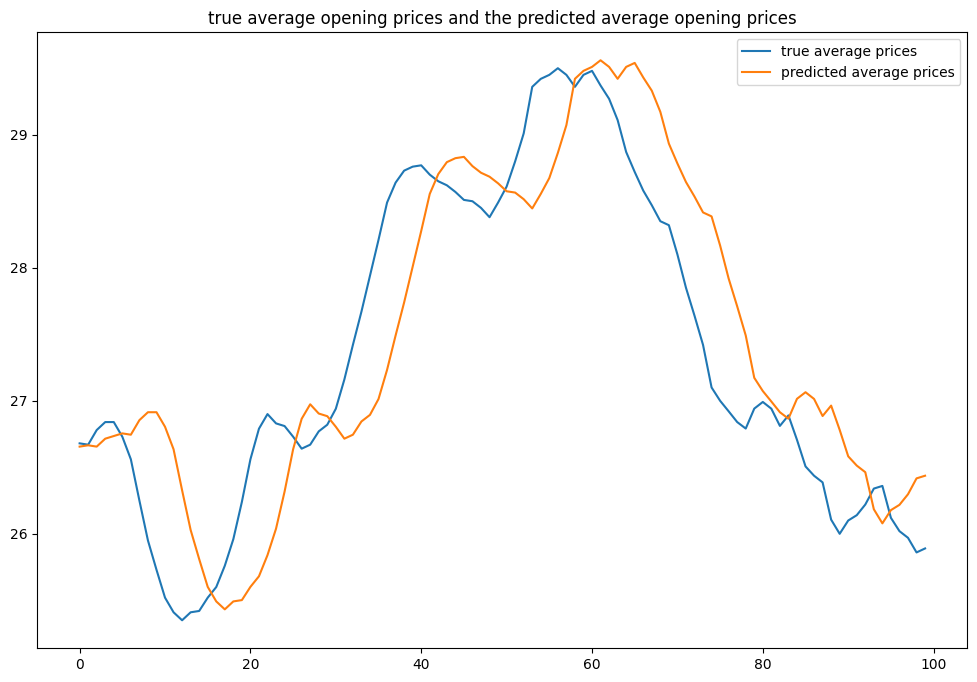

In [11]:
## b
plt.figure(figsize=(12,8))
y_pred = reg.predict(today[:100])
plt.plot(nextday[:100]) #blue line
plt.plot(y_pred)  #orange line
plt.legend(["true average prices", "predicted average prices"])
plt.title("true average opening prices and the predicted average opening prices")
plt.show()

In [14]:
## c) c). train a linear regression model that to predict the average opening price of the next five trading days based on the opening price of every day data of price of previous five days, i.e., today and past 4 days, instead of the average.
mtr = data.DataReader('0066.HK', start="2010-01-01", end="2020-06-30")
prev5days = np.array([list((
    mtr['Open'].iloc[i-4]
    ,mtr['Open'].iloc[i-3]
    ,mtr['Open'].iloc[i-2]
    ,mtr['Open'].iloc[i-1]
    ,mtr['Open'].iloc[i]))
    for i in range(4, len(mtr) - 5)
])
#print(today)
next5daysA = np.array(list(map(lambda i:
    (mtr['Open'].iloc[i+1]
    +mtr['Open'].iloc[i+2]
    +mtr['Open'].iloc[i+3]
    +mtr['Open'].iloc[i+4]
    +mtr['Open'].iloc[i+5]) / 5.0
    ,
    range(4, len(mtr) - 5)
    ))
)
x_train, x_test, y_train, y_test = train_test_split(prev5days, next5daysA, test_size=0.25) # may add a random_state
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

[*********************100%***********************]  1 of 1 completed


In [15]:
## c
res_msr = mean_squared_error(y_test, y_pred)
print(f'mean_squared_error = {res_msr}')

mean_squared_error = 0.35022541608388535


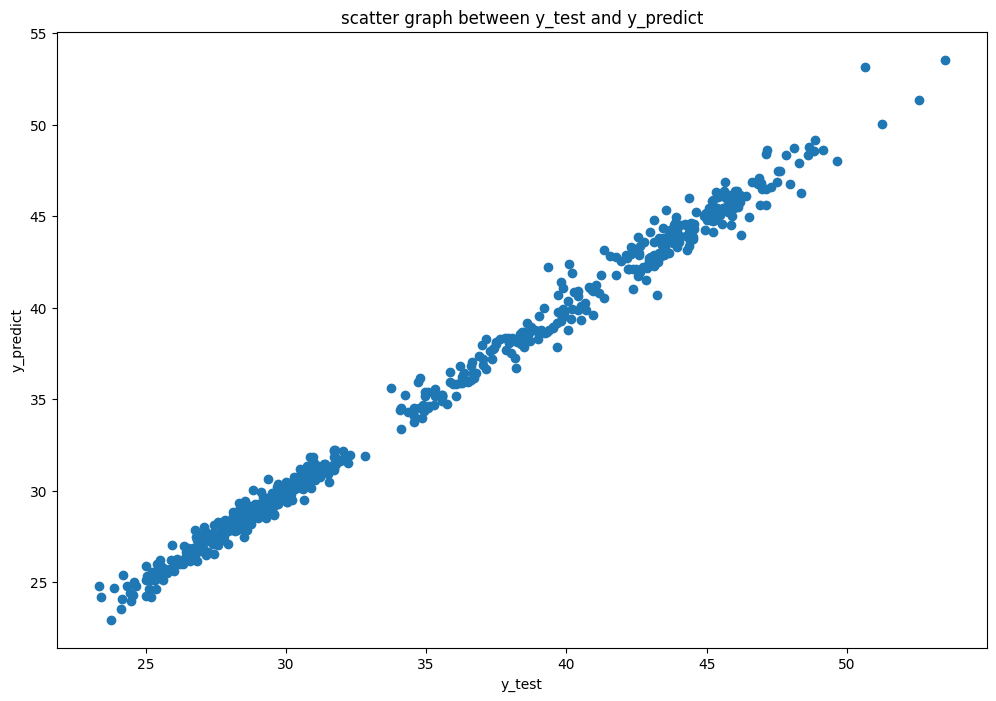

In [16]:
## c
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.title('scatter graph between y_test and y_predict')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

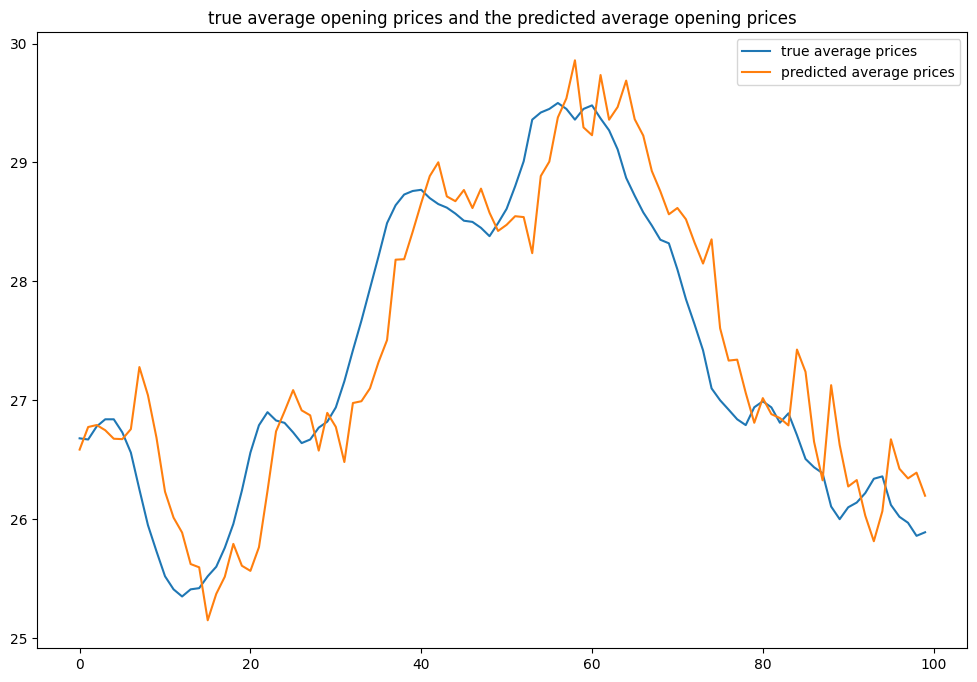

In [17]:
## c
plt.figure(figsize=(12,8))
y_pred = reg.predict(prev5days[:100])
plt.plot(next5daysA[:100]) #blue line
plt.plot(y_pred)  #orange line
plt.legend(["true average prices", "predicted average prices"])
plt.title("true average opening prices and the predicted average opening prices")
plt.show()